# Deep Learning - Day 5 - Exercise 1

Natural Language Processing corresponds to the automated study of language. To deal we texts, we have to convert them into meaningful representations that can be handled by computer. 

Usually, the first step consists of data cleaning. As you have already done it last week, we won't emphasize this part today. However, if you have finished an exercise, you feel confortable with what you have and you want to get better performances, you are welcomed to improve the data cleaning.

✅ **Good Practice** ✅ Never spend to much time on data cleaning! First, build the entire pipeline first to have a baseline evaluation of your task. Otherwise, you don't know whether your fancy data cleaning is improving the entire pipeline or not. 

After the data cleaning, let's represent each word of our vacabulary as a token (each word corresponds to a integer, each integer corresponds to a word), and then, convert each token to a vector of fixed dimension. In that manner, each word will be represented by a vector that can be fed into a (Recurrent) Neural Network.

# The data

Sentiment analysis is the task of classifying sentences according to a subjective notion or an affective state. In this notebook, we will perform such an analysis on movie reviews from the imdb database. This database contains thousands of movie reviews and the associated sentiment (positive or negative). We will train differend models to classify the sentences.

Let's first load the data. You don't have to understand what is going on in the function, it does not matter here

In [2]:
from tensorflow.keras.datasets import imdb

def load_data():
    (sentences_train, y_train), (sentences_test, y_test) = imdb.load_data()
    word_to_id = imdb.get_word_index()

    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    for i, w in enumerate(['<PAD>', '<START>', '<UNK>', '<UNUSED>']):
        word_to_id[w] = i

    id_to_word = {v:k for k, v in word_to_id.items()}

    sentences_train = [[id_to_word[_] for _ in sentence] for sentence in sentences_train]
    sentences_test = [[id_to_word[_] for _ in sentence] for sentence in sentences_test]
    
    return sentences_train, y_train, sentences_test, y_test

sentences_train, y_train, sentences_test, y_test = load_data()

Now that the data are loaded, let's look at them

❓ **Question** ❓ Plot one of two sentences to understand the sentences_train and sentences_test structures. 

(array([[218.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [189.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [141.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [550.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [147.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 41.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 69.,  54.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [299., 263.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [172.,  61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 87.,  43.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [272., 178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 69.,  30.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 80.,  37.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [131.,  69.,  38.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 55.,   8.,

/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


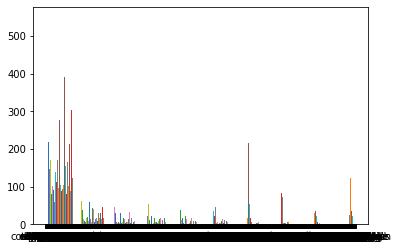

In [3]:
import matplotlib.pyplot as plt
plt.hist(sentences_train[:100])

❗ **Remark** ❗ Look at the y_train and y_test. This is a classification task where, based on the text, you try to predict where the review is negative (=0) or positive (=1). It corresponds to a sentiment analysis task.

In [4]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

# Embedding with Word2Vec

Now, let's use Word2Vec to embed the words of our sentences. Word2Vec will be able to convert each word to a fixed-size vectorial representation.

For instance, we will have:
- 'dog' --> [0.1, -0.3, 0.8]
- 'cat' --> [-1.1, 2.3, 0.7]
- 'apple' --> [3.1, 0.9, -4.7]

What you expect is to have representation such as words with close meanings are close in this embedding space, such as on the example on this image:

![Embedding](word_embedding.png)

Let's run Word2Vec!


In [7]:
!pip install -U gensim

     |████████████████████████████████| 24.2 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 8.9 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107095 sha256=83e4fdad2128adddbe5460e0dcdec87467f046606b8dc81a292e5884c39f8223
  Stored in directory: /home/florent/.cache/pip/wheels/11/73/9a/f91ac1f1816436b16423617c5be5db048697ff152a9c4346f2
Successfully built smart-open


In [8]:
from gensim.models import Word2Vec

word2vec = Word2Vec(sentences=sentences_train)

You can here print all the words that are in the dictionnary.

In [9]:
print(word2vec.wv.vocab.keys())

dict_keys(['<START>', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'imagine', 'being', 'there', 'robert', "redford's", 'is', 'an', 'amazing', 'actor', 'now', 'same', 'director', "norman's", 'father', 'came', 'from', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'fact', 'a', 'real', 'connection', 'with', 'witty', 'remarks', 'throughout', 'were', 'great', 'it', 'much', 'that', 'bought', 'soon', 'released', 'for', 'retail', 'would', 'recommend', 'to', 'everyone', 'watch', 'fly', 'fishing', 'cried', 'at', 'end', 'sad', 'know', 'what', 'say', 'if', 'cry', 'must', 'have', 'been', 'good', 'definitely', 'also', 'congratulations', 'two', 'little', "boy's", 'of', 'norman', 'paul', 'children', 'are', 'often', 'left', 'out', 'praising', 'list', 'think', 'because', 'stars', 'play', 'them', 'all', 'grown', 'up', 'such', 'big', 'profile', 'whole'

Let's look at the embedded representation of some words.

❓ **Question** ❓ Try different words - especially, try non-existing words to see that they don't have any representation (which is perfectly normal). 

In [23]:
print(word2vec.wv['a'])

[-1.3134183e+00  1.2562872e+00 -7.6672274e-01  7.2798860e-01
  4.6913978e-01 -1.8263678e-03 -1.2705709e+00 -1.9066527e-01
  1.1760068e-01  2.2581425e-01  2.6567143e-01 -8.4797925e-01
  4.2666602e-01  1.1858745e+00 -1.4655769e+00 -1.2968984e+00
 -2.1178864e-01 -1.6514034e+00 -3.5067943e-01  3.5835594e-01
  1.8971354e-01  3.4423614e+00  1.2605039e+00 -1.0730940e+00
  2.6896775e-01  3.3181105e+00  2.5460348e+00 -1.4800795e+00
 -3.0365783e-01  8.9821769e-03  2.5155464e-01 -9.5021439e-01
  1.3050058e+00 -3.7335920e-01 -1.3300400e+00 -2.4061726e-01
  2.2070544e+00  1.0964293e+00  1.0246612e+00  8.7126002e-02
  1.1035595e+00  6.7692667e-01 -1.1455561e-01  4.3198279e-01
  8.3561832e-01  1.6948285e+00 -1.2393042e+00  1.0306953e+00
 -8.6050612e-01 -9.5576084e-01 -1.3091195e+00  7.2433072e-01
 -2.5659868e-01 -2.2669668e-01 -1.0173512e+00 -7.7997708e-01
  4.9143624e-01 -1.4106141e+00  1.2598544e+00  1.8117814e-01
  1.1026416e-02  1.8981311e+00  5.1674193e-01 -2.4674597e+00
  1.0048454e+00  1.27643

❓ **Question** ❓ What is the size of each word? It corresponds to the size of the embedding space

In [22]:
len(word2vec.wv['dog'])

100

❗ **Remark** ❗ The "magic" of Word2Vec, especially the way it creates this embedding, is not discussed in this exercise. There are many many many ressources out there explaning how it works. 

The only thing to know here is that it actually trains an internal neural network (that you don't see) which, in a nutshell, corresponds to the prediction of a word based on the surroundings words in a sentences. So it choose many splits in the different sentenvecs, applies a window, choose some words as inputs $X$  and a word as output $y$ which it tries to predict, in the embedding space.

Once you have a word, you can use the `word2vec.wv.similar_by_vector` function to see what are the closest words to a given one.

❓ **Question** ❓ Let's look at the closest word (in the embedding space) to some words. You should see that there is some some of lexical proximity that we were interested in.

In [ ]:
# YOUR CODE HERE

Let's write `word2vec.wv.similar_by_vector(word2vec.wv['film'])` as W2V(film) here (for the explanation).

As any word is represented as a vector, we can do some arithmetic on the words.
For instance, we can do W2V(man) - W2V(woman)

❓ **Question** ❓ Do this mathematical operation and print the result

In [ ]:
# YOUR CODE HERE

Now, image for a second that, somehow, the following equality holds true - just for a second

    W2V(man) - W2V(woman) = W2V(king) - W2V(queen)

which is equivalent to 

    W2V(man) - W2V(woman) + W2V(queen) = W2V(king).

❓ **Question** ❓ Let's, just for fun (as it would be foolish of us to think that this equality holds true ...), do the operation W2V(man) - W2V(woman) + W2V(queen) and store it in a `res` variable (which will be a vector of size 100- that you can print.

In [ ]:
# YOUR CODE HERE

We earlier said that, for any vector, it is possible to see the closest vectors to print the word that they represent.

❓ **Question** ❓ Look at the closest vector (thanks to the `word2vec.wv.similar_by_vecto` function) of `res`

In [ ]:
# YOUR CODE HERE

## Awesome, right? 

You just did some arithmetic operations on words!

❓ **Question** ❓ Now, write a function that, given a sentence, returns a matrix that corresponds the embedding of the full sentence, which means that you have to embeed each word one after the other and concatenate the result to output a 2D matrix (be sure that your output is a numpy array)

PS: Be sure the asserts are ok! Otherwise, there is a problem

In [ ]:
import numpy as np

example = ['this', 'movie', 'is', 'probably', 'the', 'worst', 'action', 'movie', 'ever']

def embed_sentence(word2vec, sentence):
    # YOUR CODE HERE
        
embedded_sentence = embed_sentence(word2vec, example)
    
assert(type(embedded_sentence) == np.ndarray)
assert(embedded_sentence.shape == (9, 100))

❓ **Question** ❓ Write a function that, given a list of sentence (each sentence being a list of words/strings), returns a list of embedded sentences (each sentence is a matrix). Apply this function to the train and test sentences

Hint: Use the previous function `embed_sentence`

❗ **Remark** ❗ You will probably notice that some words you are trying to convert throw errors as they are said not to belong to the dictionnary:
- for the test set, this is understandable: some words were not in the train set and thus their embedded representation is unknwon
- for the train set, it might be odd but this is actually normal - we will explain it later

Nonetheless, change your function `embded_sentence` to skip words that are not in the vocabulary.

In [ ]:
def embedding(word2vec, sentences):
    
    # YOUR CODE HERE
    
    
X_train = embedding(word2vec, sentences_train)
X_test = embedding(word2vec, sentences_test)

❓ **Question** ❓ To be sure that it worked, the following function should run

In [ ]:
def check_embedding(X, ds):
    if ds == 'train':
        assert(np.shape(X[0]) == (217, 100))
    if ds == 'test':
        assert(np.shape(X[0]) == (68, 100))
    for x in X:
        assert(np.shape(x)[1] == 100)
    
check_embedding(X_train, 'train')
check_embedding(X_test, 'test')

❓ **Question** ❓ Do not forget to pad the data, as yesterday, in order to have tensors that can be divided in batch sizes during the optimization. Store the padedd values in `X_train_pad` and `X_test_pad`

In [ ]:
# YOUR CODE HERE

# The model

❓ **Question** ❓ Write a RNN with the following layers:
- a masking layer
- a LSTM with 13 units and tanh activation function
- a Dense with 10 units
- a output layer that depends on your task

❓ **Question** ❓ Then, compile your model (we advise you to use the rmsprop as the optimizer - at least to begin with)

In [ ]:
def init_model():
    # YOUR CODE HERE
    return model

model = init_model()

❓ **Question** ❓ Fit the model on your padded and embedded data - do not forget the early stopping criterion

In [ ]:
# YOUR CODE HERE

# ⚠️ Here, you can start reading the second exercise if your model takes too long. You can then come back from time to time to see if it is over

❓ **Question** ❓ Evaluate your model on the test set

In [ ]:
# YOUR CODE HERE

# Back to the Word2Vec

Remember that some of the train words used to train the word2vec were not in the word2vec vocabulary? The reason is that word2vec has some arguments that we will dig into.

❓ **Question** ❓ The first one is the `size` argument. It corresponds to the size of the embedding space. Learn a new `word2vec_2` model, still trained on the `sentences_train`, but with a smaller or higher `size`.

Verify on some words that the corresponding embedding is of your selected size.

In [ ]:
# YOUR CODE HERE

The second important argument is `min_count`. It is a integer that tells you how many occurences a given word should have to be learn in the embedding spave. For instance, let's say that the word "movie" appears 1000 times in the corpus and "simba" only 2 times. If `min_count=3`, the word "simba" will be skipped during the training.

The intention is to have only words that are sufficiently present in the corpus to have a robust embedded representation

❓ **Question** ❓ Learn a new `word2vec_3` model with a `min_count` higher than 5 (which is the default value) and a `word2vec_4` with a `min_count` smaller than 5, and then, compare the size of the vocabulary for all the different word2vec that you have trained (you can choose any `size` you want).

In [ ]:
# YOUR CODE HERE

Remember that we say that word2vec has an internal neural network that it optimizes based on some predictions? These predictions actually corresponds to predicting a word based on surrounding words. The surroundings words are in a `window` which corresponds to the number of words taken into account. And you can train the word2vec with different `window` sizes

❓ **Question** ❓ Learn a new `word2vec_5` model with a `window` different than previously (default is 5).

In [ ]:
# YOUR CODE HERE

The arguments you have seen (`size`, `min_count` and `window`) are usually the one that you should start changing to get a better performance for your model.

But you can also look at other arguments in the [documentation](https://radimrehurek.com/gensim/models/word2vec.html).

❓ **Question** ❓ Fit a Neural Network whose input derived from fine-tunned word2vec for which you have choosen different parameters. On top of that, you can improve your accuracy by trying other RNN architectures.